<a href="https://colab.research.google.com/github/chain13567/-PropTech-FinTech-/blob/main/%E9%87%91%E8%9E%8D%E7%A7%91%E6%8A%80Xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/金融科技/coidA_APPRRENT_preprocessfinal.csv',encoding = 'utf-8-sig')

# 隨機森林

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# 假設你有一個名為 df 的 DataFrame，'target' 是目標變量，其餘是特徵
features = df.drop('unit_prc', axis=1)
target = df['unit_prc']

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 建立隨機森林回歸器
reg = RandomForestRegressor(n_estimators=100, random_state=42)

# 訓練模型
reg.fit(X_train, y_train)

# 獲取特徵重要性
importances = reg.feature_importances_

# 將特徵重要性與特徵名稱對應起來
feature_importances = pd.Series(importances, index=features.columns)

# 打印出每個特徵的重要性
# print(feature_importances)

# Sort the feature importances in descending order and select the top 15
sorted_feature_importances = feature_importances.sort_values(ascending=False)[:15]

# Print the importance of each feature
print(sorted_feature_importances)

district_sell            0.544253
tot_prc                  0.156817
build_area               0.085873
coord_x                  0.037924
district                 0.033530
tot_floor                0.025088
room_age                 0.017744
revenue                  0.012615
coord_y                  0.009901
land_area                0.009068
nearest_metrodistance    0.007987
nearest_tradistance      0.006731
bstate_fg                0.006400
berth_prc                0.006280
room                     0.005491
dtype: float64


# Lasso

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
import numpy as np


# 選擇特徵和目標變數
features = df.drop('unit_prc', axis=1)
target = df['unit_prc']

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 建立 LassoCV 模型
lasso = LassoCV(cv=5, random_state=0)

# 訓練模型
lasso.fit(X_train, y_train)

# 獲取特徵的重要性
importance = np.abs(lasso.coef_)

# 列印出重要的特徵
print("Feature importances:\n")
for i in range(len(importance)):
    if importance[i] > 0:
        print(f"{features.columns[i]}: {importance[i]}")


Feature importances:

tot_prc: 0.0003620408905276789
revenue: 0.00010340198742141782


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
import numpy as np

# 選擇特徵和目標變數
features = df.drop('unit_prc', axis=1)
target = df['unit_prc']

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 創建預處理對象
scaler = StandardScaler()  # 用於標準化
mm_scaler = MinMaxScaler()  # 用於規範化

# 對訓練集進行擬合和轉換
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = mm_scaler.fit_transform(X_train_scaled)

# 對測試集進行轉換
X_test_scaled = scaler.transform(X_test)
X_test_scaled = mm_scaler.transform(X_test_scaled)

# 建立 LassoCV 模型
lasso = LassoCV(cv=5, random_state=0)

# 訓練模型
lasso.fit(X_train_scaled, y_train)

# 獲取特徵的重要性
importance = np.abs(lasso.coef_)

# 將特徵重要性與特徵名稱對應起來
feature_importances = pd.Series(importance, index=features.columns)

# 按重要性排序
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# 打印出每個特徵的重要性
print("Feature importances:\n")
for feature, importance in sorted_feature_importances.items():
  print(f"{feature}: {importance}")

Feature importances:

tot_prc: 1014.9524413464574
build_area: 746.4344039515851
berth_prc: 147.3079058497709
room: 89.53668290819984
district_sell: 49.93232548510831
revenue: 29.012249467562942
land_area: 20.727075529556515
tot_floor: 15.540279877123865
cluster: 8.150522814449515
room_age: 6.428511783584116
district: 6.1075359488588115
tsign_fg: 4.300623758415339
sell2rentratio: 4.130049983825472
district_rent: 3.975913861130279
cpi: 3.7795454220993294
year: 2.6982326908388434
land: 2.492883062792715
matl_fg: 2.4079654871260594
top_floor: 1.0059057870928891
unemployment: 0.9974431878951553
mgt_com: 0.9423728734526394
zoning_fg: 0.7821319275371302
bstate_fg: 0.7647297235955078
mainuse_fg: 0.6529422419814114
compart: 0.5390623420916032
month: 0.5160221009581717
road_fg: 0.09646724206919632
build: 0.0
day: 0.0
health: 0.0
coord_y: 0.0
nearest_tradistance: 0.0
nearest_metrodistance: 0.0
coord_x: 0.0
berth: 0.0
hall: 0.0


Average unit price:  65.25885505964736


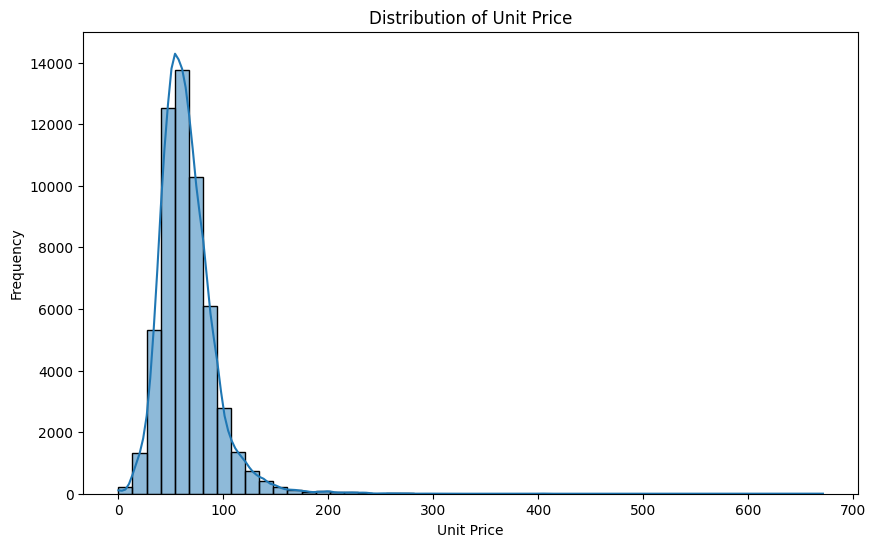

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 计算平均值
mean_price = df['unit_prc'].mean()
print('Average unit price: ', mean_price)

# 绘制直方图以查看分布
plt.figure(figsize=(10,6))
sns.histplot(df['unit_prc'], bins=50, kde=True)
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()


# Xgboost

In [ ]:
import xgboost as xgb
import pandas as pd
from sklearn.metrics import mean_squared_error

# 假設你有一個名為 df 的 DataFrame，其中包含上述提到的特徵和目標變量
features = df[['district', 'coord_x', 'coord_y', 'land', 'build',
        'berth', 'land_area', 'tot_floor', 'bstate_fg', 'room_age',
        'build_area', 'room', 'cpi', 'revenue', 'nearest_tradistance',
        'nearest_metrodistance']]
target = df['unit_prc']

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 設置 XGBoost 模型參數
params = {
    'n_estimators': 100,  # 樹的個數
    'max_depth': 10,  # 樹的最大深度
    'learning_rate': 0.1,  # 學習率
    'subsample': 0.8,  # 每棵樹樣本的子樣本比例
    'colsample_bytree': 0.8,  # 每棵樹特徵的子特徵比例
    'gamma': 0,  # 樹生長時需要的最小損失減少才會繼續分支
    'reg_alpha': 0,  # L1 正則化項的權重
    'reg_lambda': 1  # L2 正則化項的權重
}

# 建立 XGBoost 回歸器
model = xgb.XGBRegressor(**params)

# 訓練模型
model.fit(X_train, y_train)

# 使用模型進行預測
predictions = model.predict(X_test)

# # 顯示前10筆預測結果
for i in range(10):
    print(f"實際值: {y_test.iloc[i]}, 預測值: {predictions[i]}")

# 計算均方根誤差（RMSE）作為模型性能評估指標
rmse = mean_squared_error(y_test, predictions, squared=False)
# 該指標表示平均預測誤差的標準差。較小的RMSE值表示模型的預測性能較好。根據提供的RMSE值，可以說模型對目標變量的預測相對準確
print(f"均方根誤差（RMSE）: {rmse}")

實際值: 45.0, 預測值: 42.367431640625
實際值: 39.4, 預測值: 35.394168853759766
實際值: 53.1, 預測值: 54.94929122924805
實際值: 67.1, 預測值: 63.35212326049805
實際值: 82.2, 預測值: 81.9832992553711
實際值: 31.7, 預測值: 53.442169189453125
實際值: 67.9, 預測值: 65.20531463623047
實際值: 90.0, 預測值: 97.94974517822266
實際值: 60.0, 預測值: 76.57734680175781
實際值: 54.8, 預測值: 63.00616455078125
均方根誤差（RMSE）: 13.437625042388232


In [ ]:
new_data = pd.DataFrame({
     'district' : [100],
     'coord_x' : [25.042519646345433],
     'coord_y' : [121.52049715533168],
     'land' : [1],
     'build' : [1],
     'berth' : [1],
     'land_area' : [30],
     'tot_floor' : [30],
     'bstate_fg' : [4],
     'room_age' : [10],
     'build_area' : [40],
     'room' : [3],
     'cpi' : [105.04],
     'revenue' : [600000],
     'nearest_tradistance' : [0.0025008486559658],
     'nearest_metrodistance' : [0.0015874410225321]
})
# 使用模型進行預測
prediction = model.predict(new_data)

print(f"預測值: {prediction[0]}")

預測值: 105.7536849975586


In [ ]:
# 儲存模型
model.save_model('xgboost_model.json')